In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My Drive/Exercise Recognition/Dataset

[Errno 2] No such file or directory: 'drive/My Drive/Exercise Recognition/Dataset'
/content/drive/My Drive/Exercise Recognition


In [ ]:
cd Dataset

/content/drive/My Drive/Exercise Recognition/Dataset


In [ ]:
pwd

'/content/drive/MyDrive/Exercise Recognition/Dataset'

In [384]:
import os 
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Reading Input and Preprocessing

In [ ]:
file_name = 'train.csv'

In [ ]:
data = pd.read_csv(file_name)

In [ ]:
data[:1]

,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,y_left_eye_outer,z_left_eye_outer,x_right_eye_inner,y_right_eye_inner,z_right_eye_inner,x_right_eye,y_right_eye,z_right_eye,x_right_eye_outer,y_right_eye_outer,z_right_eye_outer,x_left_ear,y_left_ear,z_left_ear,x_right_ear,y_right_ear,z_right_ear,x_mouth_left,y_mouth_left,z_mouth_left,x_mouth_right,y_mouth_right,z_mouth_right,x_left_shoulder,y_left_shoulder,z_left_shoulder,x_right_shoulder,y_right_shoulder,...,z_left_index_1,x_right_index_1,y_right_index_1,z_right_index_1,x_left_thumb_2,y_left_thumb_2,z_left_thumb_2,x_right_thumb_2,y_right_thumb_2,z_right_thumb_2,x_left_hip,y_left_hip,z_left_hip,x_right_hip,y_right_hip,z_right_hip,x_left_knee,y_left_knee,z_left_knee,x_right_knee,y_right_knee,z_right_knee,x_left_ankle,y_left_ankle,z_left_ankle,x_right_ankle,y_right_ankle,z_right_ankle,x_left_heel,y_left_heel,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,0,squats_up,-0.382815,-48.23125,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.05889,-51.986694,0.858925,-50.095238,-51.990562,-0.944965,-50.043823,-52.100212,-1.31201,-50.045204,-52.1105,-1.666087,-50.049793,-52.118183,1.391252,-49.56111,-34.12806,-2.129166,-49.438534,-34.45231,0.38357,-46.11849,-47.33396,-0.900883,-45.979576,-47.48003,5.738914,-40.14495,-22.74688,-6.305204,-39.85304,...,-47.528847,-3.262014,-51.032917,-30.224722,2.547942,-49.83502,-46.619106,-3.911464,-50.188213,-29.946009,3.941272,-0.331902,0.79639,-3.941272,0.33191,-0.79639,8.96218,25.898516,7.293593,-8.957223,26.042614,-1.410017,13.009448,48.306595,31.770035,-12.889769,48.558,20.343771,12.131386,52.539825,33.283375,-12.302963,52.377,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.05014


In [ ]:
y = data['pose']

exercise_dict = {}
for pose in y.unique():
  if "_up" in pose:
    exercise_dict[pose] = pose[:-3]
  if "_down" in pose:
    exercise_dict[pose] = pose[:-5]
exercise_dict

{'squats_up': 'squats',
 'situp_down': 'situp',
 'jumping_jacks_up': 'jumping_jacks',
 'jumping_jacks_down': 'jumping_jacks',
 'pullups_down': 'pullups',
 'pushups_down': 'pushups',
 'pushups_up': 'pushups',
 'squats_down': 'squats',
 'pullups_up': 'pullups',
 'situp_up': 'situp'}

In [ ]:
for i in range(len(y)):
  y[i] = exercise_dict[y[i]]
y.value_counts()

<ipython-input-327-36bd73d77fa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = exercise_dict[y[i]]


jumping_jacks    296
pullups          231
squats           212
pushups          197
situp            161
Name: pose, dtype: int64

In [ ]:
y = data['pose']

lb = LabelEncoder()
y = lb.fit_transform(np.array(y))
y[:5]

array([4, 3, 3, 0, 0])

In [ ]:
X = data.drop(['pose_id','pose'], axis=1)
X[:5]

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,y_left_eye_outer,z_left_eye_outer,x_right_eye_inner,y_right_eye_inner,z_right_eye_inner,x_right_eye,y_right_eye,z_right_eye,x_right_eye_outer,y_right_eye_outer,z_right_eye_outer,x_left_ear,y_left_ear,z_left_ear,x_right_ear,y_right_ear,z_right_ear,x_mouth_left,y_mouth_left,z_mouth_left,x_mouth_right,y_mouth_right,z_mouth_right,x_left_shoulder,y_left_shoulder,z_left_shoulder,x_right_shoulder,y_right_shoulder,z_right_shoulder,x_left_elbow,...,z_left_index_1,x_right_index_1,y_right_index_1,z_right_index_1,x_left_thumb_2,y_left_thumb_2,z_left_thumb_2,x_right_thumb_2,y_right_thumb_2,z_right_thumb_2,x_left_hip,y_left_hip,z_left_hip,x_right_hip,y_right_hip,z_right_hip,x_left_knee,y_left_knee,z_left_knee,x_right_knee,y_right_knee,z_right_knee,x_left_ankle,y_left_ankle,z_left_ankle,x_right_ankle,y_right_ankle,z_right_ankle,x_left_heel,y_left_heel,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,-51.986694,0.858925,-50.095238,-51.990562,-0.944965,-50.043823,-52.100212,-1.312010,-50.045204,-52.110500,-1.666087,-50.049793,-52.118183,1.391252,-49.561110,-34.128060,-2.129166,-49.438534,-34.452310,0.383570,-46.118490,-47.333960,-0.900883,-45.979576,-47.480030,5.738914,-40.144950,-22.746880,-6.305204,-39.853040,-27.302664,13.372133,...,-47.528847,-3.262014,-51.032917,-30.224722,2.547942,-49.835020,-46.619106,-3.911464,-50.188213,-29.946009,3.941272,-0.331902,0.796390,-3.941272,0.331910,-0.796390,8.962180,25.898516,7.293593,-8.957223,26.042614,-1.410017,13.009448,48.306595,31.770035,-12.889769,48.558000,20.343771,12.131386,52.539825,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,-0.378148,56.832386,-9.959992,-0.393090,56.771534,-11.322549,8.051952,56.807620,-10.797570,8.082252,56.856895,-10.198024,8.090899,56.030212,-2.987591,-14.948544,56.216866,-4.045631,22.732527,51.792070,-10.819235,1.174463,51.673610,-10.973726,12.117217,43.989132,6.855316,-39.861504,35.899864,-2.642102,51.833416,39.639700,...,-33.215330,32.584280,-73.832770,62.104830,40.996197,-87.910330,-30.342860,32.049010,-72.626370,63.277740,0.415797,5.048746,-26.638025,-0.415784,-5.048746,26.638025,-23.353056,-44.731440,-32.788300,-21.294983,-46.921917,32.153625,-44.443314,2.445917,-11.077418,-39.064700,-6.034986,59.338997,-44.689724,12.427547,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,88.543910,15.034156,-53.758410,88.517320,9.863874,-57.539623,92.478730,9.031911,-58.161617,92.484880,8.581500,-58.051617,92.475080,17.989803,-49.105732,92.228960,9.799322,-53.504227,111.274315,12.221407,-48.951060,85.777590,9.719144,-49.888440,91.067140,23.793780,-33.113200,70.464325,3.230740,-36.063040,104.769325,26.182497,...,4.465174,3.694231,-58.542763,11.935460,11.473880,-53.384926,4.493569,3.622092,-56.416702,13.387944,6.385060,3.175631,-10.912813,-6.385060,-3.175655,10.912813,0.544692,43.410904,-89.385060,-36.917480,19.011257,-7.333317,-2.400989,92.869170,-127.827560,-60.212690,42.732136,-15.173836,-3.758022,97.915110,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,-30.007776,2.137811,-52.894382,-30.017630,-0.017299,-53.306460,-30.900032,-0.575759,-53.313183,-30.905216,-1.085549,-53.299667,-30.904652,2.335814,-51.186380,-14.033243,-2.161218,-51.708570,-18.156685,1.596020,-48.817970,-27.945635,0.026888,-49.086235,-29.108297,5.146463,-40.351410,-9.978578,-4.480538,-3

In [ ]:
print('X shape: ' , X.shape)
print('y shape: ' , y.shape)

X shape:  (1097, 99)
y shape:  (1097,)


In [ ]:
data.isnull().values.any()

False

In [ ]:
#Check the data range for each fetaure, check if scaling is required
data_range = X.describe().loc[['min', 'max']]
data_range

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,y_left_eye_outer,z_left_eye_outer,x_right_eye_inner,y_right_eye_inner,z_right_eye_inner,x_right_eye,y_right_eye,z_right_eye,x_right_eye_outer,y_right_eye_outer,z_right_eye_outer,x_left_ear,y_left_ear,z_left_ear,x_right_ear,y_right_ear,z_right_ear,x_mouth_left,y_mouth_left,z_mouth_left,x_mouth_right,y_mouth_right,z_mouth_right,x_left_shoulder,y_left_shoulder,z_left_shoulder,x_right_shoulder,y_right_shoulder,z_right_shoulder,x_left_elbow,...,z_left_index_1,x_right_index_1,y_right_index_1,z_right_index_1,x_left_thumb_2,y_left_thumb_2,z_left_thumb_2,x_right_thumb_2,y_right_thumb_2,z_right_thumb_2,x_left_hip,y_left_hip,z_left_hip,x_right_hip,y_right_hip,z_right_hip,x_left_knee,y_left_knee,z_left_knee,x_right_knee,y_right_knee,z_right_knee,x_left_ankle,y_left_ankle,z_left_ankle,x_right_ankle,y_right_ankle,z_right_ankle,x_left_heel,y_left_heel,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
min,-65.973076,-68.403656,-445.80008,-66.53818,-71.202156,-458.56757,-65.19166,-71.224174,-458.57944,-64.94221,-71.31701,-458.67056,-66.657745,-72.438034,-459.2281,-66.577270,-73.02422,-459.32736,-67.245674,-73.569695,-459.37506,-61.420036,-69.016800,-424.54022,-64.322975,-70.671070,-427.84686,-63.336056,-63.510395,-422.7426,-64.696900,-63.927490,-424.13812,-44.555332,-52.025050,-322.17606,-53.588260,-49.994736,-331.37012,-52.230980,...,-248.90935,-80.96620,-97.77019,-278.30444,-71.114685,-97.713806,-237.95856,-79.52413,-96.32578,-252.88203,-16.397907,-11.419733,-51.663525,-19.060642,-12.999614,-33.714275,-36.314540,-59.261780,-190.24512,-44.932125,-57.359802,-149.92245,-69.50143,-91.31220,-351.74878,-86.36014,-90.81632,-316.36227,-76.78912,-99.81716,-368.98788,-87.27601,-99.96940,-334.56387,-81.99221,-99.27519,-423.63757,-97.181305,-99.920200,-380.1540
max,64.850930,83.510440,242.46538,66.83467,80.629990,253.63815,67.45822,79.560450,253.77429,64.51383,77.76981,253.70279,62.453610,81.047905,250.1798,61.723488,79.94214,250.11131,61.110146,78.656944,250.17926,60.976337,67.727196,262.18176,57.012970,69.501495,247.04110,59.654360,80.693220,241.9055,57.658726,80.070114,236.81583,53.379135,51.211338,229.26810,44.328262,48.726196,196.10555,72.591606,...,244.60620,81.01217,99.55650,252.83534,85.223210,96.072440,241.02571,79.10815,97.16946,244.53249,19.060642,12.999614,33.714275,16.397902,11.419730,51.663525,50.403183,68.706856,261.43777,51.367910,68.215460,263.35160,79.46488,92.86917,512.35394,75.65979,88.52534,512.58450,83.66601,97.91511,541.71110,83.39162,98.51814,540.97160,98.58645,99.82903,565.34240,94.965490,99.537735,558.5236


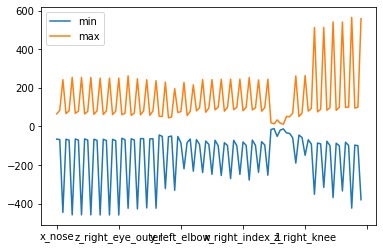

In [ ]:
pd.DataFrame(data_range).T.plot()
plt.show()

In [ ]:
#Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
scaled_data_range = X_scaled.describe().loc[['min', 'max']]
scaled_data_range

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
min,-2.793186,-1.001372,-7.598094,-2.737213,-1.011504,-7.787149,-2.696016,-1.015425,-7.787207,-2.700236,-1.022198,-7.787759,-2.707442,-1.052409,-7.771252,-2.692583,-1.076538,-7.771812,-2.710537,-1.099365,-7.772557,-2.656899,-1.033385,-7.814538,-2.659993,-1.094240,-7.741042,-2.852173,-0.961620,-7.636401,-2.865933,-0.978945,-7.621973,-2.591224,-1.106887,-6.781395,-2.653988,-1.026829,-6.806114,-2.980375,...,-3.794061,-3.059716,-1.586059,-4.176565,-3.185263,-1.622638,-3.898884,-3.113041,-1.605735,-4.050595,-5.305544,-3.822166,-3.822264,-4.660213,-4.328208,-2.577786,-2.732293,-3.687280,-4.679614,-2.756043,-3.657040,-3.825397,-2.89250,-4.486262,-5.765450,-3.177292,-4.504614,-5.310895,-2.982608,-4.608481,-5.779892,-3.050483,-4.658433,-5.357641,-2.935780,-4.447798,-6.058401,-3.114525,-4.454798,-5.528262
max,2.741176,3.893669,5.000285,2.709651,3.834327,5.169627,2.723897,3.817863,5.172089,2.594127,3.779536,5.170391,2.568678,3.856258,5.084658,2.552833,3.848728,5.082799,2.542011,3.830999,5.084194,2.506620,3.688720,5.548461,2.466059,3.758138,5.144075,2.632065,3.940901,5.194904,2.591808,3.939306,5.065115,2.607204,3.874458,5.491483,2.578127,3.812762,4.562758,3.389955,...,4.724990,3.544754,2.636694,4.610259,3.422124,2.610335,4.874505,3.576207,2.656253,4.676925,4.660213,4.328209,2.577786,5.305543,3.822164,3.822264,3.252892,2.743403,6.438208,3.751460,2.762529,6.544288,3.01653,2.176795,7.476092,3.128040,2.034212,7.525366,2.996375,2.143964,7.529230,3.237744,2.180686,7.557574,3.280579,1.900232,7.621331,3.388714,1.899604,7.550443


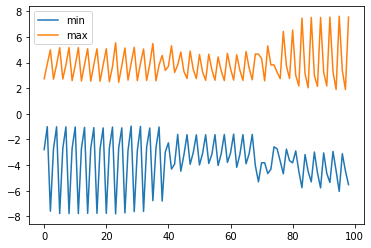

In [ ]:
pd.DataFrame(scaled_data_range).T.plot()
plt.show()

In [ ]:
#Split Data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)
print("X_train size: " , X_train.shape)
print("X_test size: " , X_test.shape)
print("y_train size: " , y_train.shape)
print("y_test size: " , y_test.shape)

X_train size:  (877, 99)
X_test size:  (220, 99)
y_train size:  (877,)
y_test size:  (220,)


# **Trying different Classifiers**


1.   Logistic Regression
2.   XGBoost
3.   Decision Tree
4.   Random Forests



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: " , accuracy)
print("Classification Report: ", report)


Accuracy:  0.8181818181818182
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.87      0.81        54
           1       0.83      0.68      0.75        57
           2       0.95      0.95      0.95        38
           3       0.88      0.86      0.87        35
           4       0.72      0.78      0.75        36

    accuracy                           0.82       220
   macro avg       0.83      0.83      0.82       220
weighted avg       0.82      0.82      0.82       220



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [388]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: " , accuracy)
print("Classification Report: ", report)


Accuracy:  0.8590909090909091
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.85      0.79      0.82        57
           2       0.88      0.97      0.93        38
           3       0.88      0.86      0.87        35
           4       0.82      0.86      0.84        36

    accuracy                           0.86       220
   macro avg       0.86      0.87      0.86       220
weighted avg       0.86      0.86      0.86       220



Accuracy:  0.7227272727272728
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.76      0.71        54
           1       0.75      0.58      0.65        57
           2       0.88      0.95      0.91        38
           3       0.80      0.69      0.74        35
           4       0.58      0.69      0.63        36

    accuracy                           0.72       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.72      0.72       220



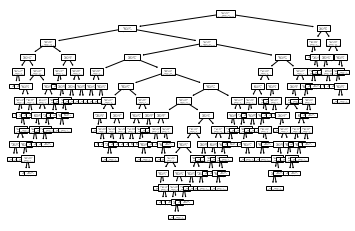

In [385]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: " , accuracy)
print("Classification Report: ", report)

tree = plot_tree(model)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: " , accuracy)
print("Classification Report: ", report)

Accuracy:  0.8909090909090909
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.89      0.82      0.85        57
           2       0.95      0.97      0.96        38
           3       0.86      0.91      0.89        35
           4       0.86      0.86      0.86        36

    accuracy                           0.89       220
   macro avg       0.89      0.90      0.89       220
weighted avg       0.89      0.89      0.89       220

